# Final Exam

**Notes:**
1. You have 3 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged. **Late exams will not be accepted.**   A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late. This is meant to insure that you have a full 3 hours to work on the exam, and then a little bit of time to turn in it. It is not extra time to work on the exam!
1. You must work on the exam yourself.  It must all be your work.  You are free to use whatever resources you wish except other people.  I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times.  **Do not discuss the exam with other students until everyone has completed it.**
1. The exam is meant to be completed in the allotted time.  I may have misjudged the amount of time the questions will take.  Keep in mind that everyone is in the same situation as yourself.  If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades.  It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
1. The points for each problem is given below.  You can use this information to decide how to apportion your time working on the problems.
1. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description.  The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
1. **Read the questions carefully.** There is important information given in various places in various parts of the problem.  Do not skip reading sections, even if they are very small.

## Initialization

Collect all your initialization here.  Make sure all figures are inlined by using `%matplotlib inline`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy.special as sf
import scipy.integrate as integ
import scipy.linalg as la
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## 1. Plotting [10 points]

Figures are an essential way in which we quickly convey complex information.  Clear, well constructed figures are essential for explaining our results.

As an example of this, here is an attempt to show that some algorithm has converged.  The details are not important, here we want to focus on showing the results clearly and concisely.  Any one viewing this figure should be able to immediately understand what is being plotted and interpret the results.

Below the array `conv` provides the data for the convergence rate.  An attempt at a quick plot is shown.

(*Note:* This cell assumes you have imported the standard modules in the standard way. Make sure you have done this!)

Text(0.5, 1.0, 'Example Algorithm Convergence Rate')

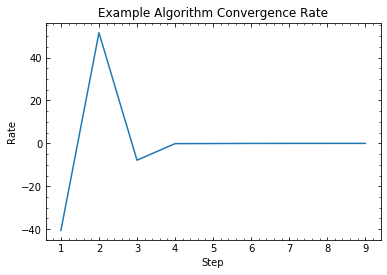

In [2]:
conv = np.array([-4.05591655e+01,  5.15597369e+01, -7.83200176e+00, -1.12681175e-01,
       -7.27523820e-02, -1.83216073e-02, -4.61449974e-03, -1.15653325e-03,
       -2.89365173e-04])
plt.plot(np.arange(1,len(conv)+1), conv)
plt.xlabel('Step')
plt.ylabel('Rate')
plt.title('Example Algorithm Convergence Rate')

This plot does a poor job of conveying the desired information.  Describe in words what is wrong with this plot.
(*Note:* Though not every thing is wrong with the plot, there are at least three important things I can see, there may be others!  )

A horizonatal line at zero would be helpful for visualizing when the convergence rate is equal to zero. A scatterplot is probably more useful here because the convergence rate does not actually take on values between steps. Also, we should get rid of the annoying text above the plot created from the last line of code. 

Produce a high quality figure fixing the errors noted above.

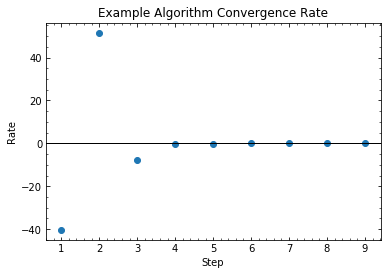

In [3]:
plt.scatter(np.arange(1,len(conv)+1), conv)
plt.axhline(0, linewidth = 1, color = 'black')
plt.xlabel('Step')
plt.ylabel('Rate')
plt.title('Example Algorithm Convergence Rate');

## 2. White Dwarf Mass [35 points]

A white dwarf is a star consisting of protons, neutrons, and electrons, where the degeneracy pressure of the electrons is what stabilizes the star and prevents it from collapsing.  In other words, the Pauli exclusion principle plays an important role.  This can support the star until its mass exceeds a critical value, known as the Chandrasekhar mass, at which point the star will again begin to collapse, producing a neutron star.  Here we will numerically determine the Chandrasekhar mass.

From the application of Newtonian mechanics and the statistical mechanics of a degenerate Fermi gas (as is appropriate for electrons, which are fermions and thus obey Fermi-Dirac statistics), it can be shown that the relevant equations for describing the mass and density profile of the star are
\begin{align}
 \frac{\mathrm{d}\bar M}{\mathrm{d}\bar r} &= \bar{r}^2 \bar{\rho}, \\
 \frac{\mathrm{d}\bar \rho}{\mathrm{d}\bar r} &= - \frac{\bar{M} \bar{\rho}^{2/3}}{\bar{r}^2}.
\end{align}
Naturally, this is written in dimensionless form with a lot of details buried in the definitions.  Here we have scaled the mass and the radius:
$$ \bar{M} \equiv \frac{M}{M_0}, \quad \bar{r} \equiv \frac{r}{R_0}. $$
From the underlying physics we have defined
$$ R_0 \equiv \sqrt{\frac{(3\pi^2)^{1/3} \hbar c}{12\pi G} \left( \frac{\alpha}{m_N} \right)^{4/3} \frac{1}{\rho_0^{2/3}}}, \quad M_0 \equiv 4\pi R_0^3 \rho_0. $$
These are further defined in terms of
$$ \rho_0 = \frac{n_0 m_N}{\alpha}, \quad n_0 = \frac{m_e^3 c^3}{3\pi \hbar^3}, $$
where we see a number of constants of nature showing up.  In particular, $m_e$ is the mass of the electron and $m_N$ is the mass of a nucleon (the proton or neutron, which are treated as having the same mass).  Also, $\alpha$ depends on details of the star.  For a white dwarf we use $\alpha=1/2$.

There are a number of ways of computing these quantities.  Though SI units are not the most natural ones to use in this case, we will use those units for the constants anyway.  To make your life a little easier, here are the relevant constants defined for you.  Notice quantities relevant for the Sun are also provided and will be used below.

In [4]:
# Important constants.
c = 2.99792e8 # m/s
hbar = 1.05457e-34 # J s
me = 9.20938e-31 # kg
mN =  1.67e-27 # kg
G = 6.67408e-11 # m^3 / kg / s
# Other constants
Msun = 1.98847e+30 # kg
Rsun = 6.957e8 # m
alpha = 1/2

To find the Chandrasekhar mass we need to solve the system of differential equations given above.  Ideally we start from the center of the star and integrate outward, that is, we start with initial conditions $\bar{\rho}(0)=\bar{\rho}_c$ and $\bar{M}(0)=0$.  The radius of the star, $\bar{r}_*$, is determined from $\bar{\rho}(\bar{r}_*)=0$.  So, for different choices of $\bar{\rho}_c$, we can determine the mass of the star, $\bar{M}_*=\bar{M}(\bar{r}_*)$.  At least in principle.  In practice we immediately run into a problem.

Looking at the differential equations above, explain why we cannot start with initial conditions at $\bar{r}=0$.

If we start with $\bar{r}=0$, then $\frac{d\bar{\rho}}{d\bar{r}}$ will blow up because it has $\bar{r}^2$ in the denominator. 

To overcome this problem we will instead start at $\bar{r}=\epsilon\ll 1$.  There are a couple of ways that we can estimate the initial conditions at $\bar{r}=\epsilon$.  One is to use our favorite thing from calculus, Taylor expansions.  Unfortunately we will not do that here.  An almost equivalent (and simpler) method is to instead assume $\bar{\rho}(\bar{r}) \approx \bar{\rho}_c$, a constant, for $\bar{r}\ll 1$.  Since we are treating this as a constant, we can analytically integrate one of the differential equations to find $\bar{M}(\epsilon)$ in terms of $\bar{\rho}_c$ and $\epsilon$.

Explain how we can find, and typeset, the expression for $\bar{M}(\epsilon)$ below.

We can find $\bar{M}(\epsilon)$ by solving the differntial equation
$$\frac{d\bar{M}}{d\bar{r}}=\bar{r}^2\bar{\rho}_c.$$
This is a seperable differential equation, and it can be solved by integrating. The solution is
$$\bar{M}(\epsilon)=\bar{\rho}_c\frac{\epsilon^3}{3}.$$

Now that we know the initial conditions we can start solving for the structure of a white dwarf.  Write a function that can be passed to `scipy.integrate.solve_ivp` that will allow us to solve the system of differential equations.

There is one important subtlety to keep in mind.  We will solve the system of equations beyond their physical limit (outside the star).  When this happens we transition to the region $\bar\rho<0$.  Numerically this can cause a problem.  Consider a number $x$, if we calculate $x^y$, where $y$ is an arbitrary number, this will fail when $x<0$ and $y$ is not an integer since, mathematically, how do we take "roots" of negative numbers?  For things like the cube root this is actually fine, but in general it is ambiguous.  In our case, however, we see that we have $\bar{\rho}^{2/3}$.  We can think of this as $(\bar{\rho}^2)^{1/3}$.  Thus we will always be taking the cube root of a positive number and there is no ambiguity of which root we mean.  We should make sure to write our equations in a form that avoid this potential problem.

In [5]:
def white_dwarf(r, y) :
    """Returns the derivatives of the mass and density
    of the white dwarf. Everthing in special untis of Mo and Ro.
    Parameters
    ----------
    r : radius
    y : an array containing the mass and density
        y[0] : mass 
        y[1] : density 
    Returns dydt
        dydt[0] : derivative of mass
        dydt[1] : derivative of density"""
    dydt = np.zeros_like(y)
    dydt[0] = r**2*y[1]
    dydt[1] = -y[0]*(y[1]**2)**(1/3)/r**2
    return dydt

We are almost ready to find the mass and radius of a white dwarf.  As a final preparation step, calculate the numerical values for $R_0$ and $M_0$ and store them in variables.  Print them in terms of SI units as well as in terms of the radius and mass of the Sun, respectively.  We will use this below when we find the mass and radius of a white dwarf.

In [6]:
#Construct constants
no = me**3*c**3/(3*np.pi*hbar**3)
po = no*mN/alpha
Ro = np.sqrt(((3*np.pi**2)**(1/3)*hbar*c)/(12*np.pi*G)*(alpha/mN)**(4/3)
             *(1/po**(2/3)))
Mo = 4*np.pi*Ro**3*po

#Convert to sun units
Mo_sun = Mo/Msun
Ro_sun = Ro/Rsun

#Print results
print(f"""Mo : {Mo} kg or {Mo_sun} Sun masses
R0 : {Ro} m or {Ro_sun} Sun radii""")

Mo : 2.7301519452712932e+29 kg or 0.13729912672915826 Sun masses
R0 : 1506117.4882239955 m or 0.0021648950527871145 Sun radii


Finally we can solve for the mass and radius of a white dwarf.  We proceed as follows.
1. We start with some value of $\bar{\rho}_c$ and we choose a values for $\epsilon$ (small, but not too small, you should make sure it is much smaller than any $\bar{r}_*$ you find).  From these choices determine the initial conditions.
1. Solve the system of differential equations.
1. From the solution and the condition $\bar{\rho}(\bar{r}_*)=0$ find $\bar{r}_*$.
1. From the solution and the now known value of $\bar{r}_*$ find $\bar{M}_*=\bar{M}(\bar{r}_*)$.

Using this procedure, choose $\bar{\rho}_c=0.1$.  Calculate and print $r_*$ in units of $R_0$, SI units, and in terms of the radius of the Sun.  Similarly, calculate and print $M_*$ in units of $M_0$, SI units, and in terms of the mass of the Sun.  (*Note*: The mass you get should be quite close to the typically quoted value of the Chandrasekhar mass!)

In [7]:
#Define constants and initial conditions
pc = .1
epsilon = 10**(-3)
Mep = pc*epsilon**3/3
y0 = np.array([Mep, pc])

#Make events function
def neg_p(r, y) : return y[1]
neg_p.terminal = True
neg_p.direction = -1

#Solve the differential equation
sol = integ.solve_ivp(white_dwarf, (epsilon, 1000), y0, atol = 10**(-12),
                     rtol = 10**(-12), events = neg_p)

#Find the radius and mass
r_star = sol.t[-1]
M_star = sol.y[0][-1]

#Convert to SI and sun units
r_star_SI = r_star*Ro
r_star_sun = r_star*Ro_sun
M_star_SI = M_star*Mo
M_star_sun = M_star*Mo_sun

#Print results
print(f"""rstar : {r_star} Ro
        {r_star_SI} m
        {r_star_sun} Sun radii
M_star : {M_star} Mo
         {M_star_SI} kg
         {M_star_sun} Sun masses""")

rstar : 25.730951966283044 Ro
        38753836.745070495 m
        0.05570481061530904 Sun radii
M_star : 10.487061626133604 Mo
         2.863127169876859e+30 kg
         1.4398644032230101 Sun masses


Next we can explore the radius of the white dwarf as a function of the central density.  Take the procedure you used above and write a function that takes as an argument the central density, $\bar{\rho}_c$, and returns $\bar{r}_*$ and $\bar{M}_*$.  Verify that you get the same answer as above for $\bar{\rho}_c=0.1$.

In [8]:
def white_dwarf_func(pc) :
    """Returns the radius and mass of a white dwarf given a
    central density.
    pc : central
    It returns a tuple where the first element is the radius and the
    second is the mass. They are in units of Mo and Ro"""
    #Construct constants and intial conditions
    epsilon = 10**(-3)
    Mep = pc*epsilon**3/3
    y0 = np.array([Mep, pc])
    
    #Make events function
    def neg_p(r, y) : return y[1]
    neg_p.terminal = True
    neg_p.direction = -1
    
    #Solve differntial equation
    sol = integ.solve_ivp(white_dwarf, (epsilon, 10000), y0, atol = 10**(-12),
                     rtol = 10**(-12), events = neg_p)
    
    #Get and return results
    r_star = sol.t[-1]
    M_star = sol.y[0][-1]
    return r_star, M_star

#Assert that the function agrees with our previous findings
assert(np.allclose(r_star, white_dwarf_func(pc)[0]))
assert(np.allclose(M_star, white_dwarf_func(pc)[1]))

Apply you function above to a range of central densities logarithmically spaced between $\bar{\rho}_c=0.1$ and $\bar{\rho}_c=10^3$.  Choose enough values to produce a smooth plot of the radius of the white dwarf in units of the radius of the Sun as a function of $\bar{rho}_c$.  Provide that plot below.  (*Notes:* The function `np.logspace` can be convenient to use. If you have not used it before, check its documentation, it does not necessarily work the way you think it does! It is also worthwhile to look at the masses, what do you find?, Finally, how should we choose to represent the results? How should we scale the axes?)

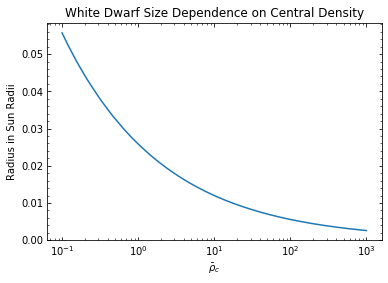

In [9]:
#Make finely spaced array of central densities
pc_arr = np.logspace(-1, 3, 300)

#Vectorize our fucntion from earlier
white_dwarf_funcv = np.vectorize(white_dwarf_func)

#Calculate arrays of mass and radius
r_arr, M_arr = white_dwarf_funcv(pc_arr)

#Convert units to Sun radii
r_arr_sun = r_arr*Ro_sun

#Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(pc_arr, r_arr_sun)
ax.set_xlabel(r'$\bar{\rho}_c$')
ax.set_ylabel('Radius in Sun Radii')
ax.set_title('White Dwarf Size Dependence on Central Density');

## 3. Correlated Random Variables [15 points]

We briefly discussed generating random numbers in more than one dimension, however, we only considered cases where all the numbers were independent of each other.  What would we do if the numbers are correlated?  The short answer: decorrelate them!  Here we will consider a simple example of what that means.

One example of this is uniformly sampling the interior of an ellipse.  We could do this with the rejection method, but here we will instead develop a more sophisticated and efficient approach.

Consider an ellipse given by
$$ 5 x_1^2 - \frac{11}{4} x_1 x_2 + 15 x_2^2 = 13. $$
To uniformly sample inside this ellipse we will use the fact that we know how to uniformly sample inside a circle.  Thus, we will proceed by first mapping the ellipse to the unit circle, sampling inside the unit circle, then mapping back to the ellipse.  That does not sound so bad ....

In more detail, we can follow the steps outlined below.
1. Write the ellipse in matrix form as
$$ \vec{x}^T \mathsf{A} \vec{x} = \gamma, $$
where 
$$ \vec{x} \equiv \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, $$
and we can "read off" the matrix $\mathsf{A}$ and the constant $\gamma$ from the equation for the ellipse given above.  Note that we want $\mathsf{A}$ to be a *symmetric* matrix.
1. Diagonalize $\mathsf{A}$ to find the "principal axes" of the ellipse.  We can also use this to find the "new coordinate system", $\vec{x}' = \mathsf{B}^T \vec{x}$, such that the ellipse is now in standard form,
$$ \left( \frac{x_1'}{a} \right)^2 + \left( \frac{x_2'}{b} \right)^2 = 1. $$
Here we need to find the matrix $\mathsf{B}$ and the numbers $a$ and $b$.
1. Rescale the components of $\vec{x}'$ to find a new set of coordinates, $\vec{x}''$, such that they satisfiy the equation for a unit circle
$$ x_1''^2 + x_2''^2 = 1. $$
(*Note:* No, this is not a trick step. It is as straight forward as you think it should be.)
1. We can now uniformly sample values of $x_1''$ and $x_2''$ since we know how to uniformly sample a circle!
1. For each set of uniform samples of the circle we can walk the steps above in reverse to first find $x_1'$ and $x_2'$, then to find $x_1$ and $x_2$.  Once we have done this, we will have a set of unform samples inside the ellipse.

**Problem:** Produce a nice figure showing the ellipse and 3000 uniformly sampled points inside of it.  That is all!  You will not be asked to show each step.  The code in the cell below should implement the steps discussed above and produce the final plot.  Here are some helpful hints.
1. We required $\mathsf{A}$ to be symmetric so that the matrix $\mathsf{B}$ you will find is orthogonal.  This is useful as it will make inverting $\vec{x}' = \mathsf{B}^T \vec{x}$ to find $\vec{x}$ from $\vec{x}'$ much easier.
1. Matrix multiplication is matrix multiplication! We will want to not just work with single vectors, but instead a set of vectors.  If we put these vectors together into a matrix in a smart way, then the transformation steps we discussed above become simple matrix multiplications.  In other words, suppose I have $N$ vectors $\{\vec{x}_j\}$, each with 2 components.  Here we have labeled each vector by an index, $j$.  If we construct a matrix, $\mathsf{X}$, by putting the vector $\vec{x}_j$ in column $j$, then $\mathsf{X}$ will have size $2\times N$ (a matrix with 2 rows and $N$ columns).  Finally, if $\mathsf{B}$ is a $2\times 2$ matrix, then the operation $\mathsf{B}^T \mathsf{X}$ will produce a new $2\times N$ matrix where the columns of this matrix are are exactly the transformed $\vec{x}_j$, in other words, what we would call the $\vec{x}'_j$.  Thus, no loops are required to transform a set of vectors.
1. How can we draw the outline of an ellipse?  Particularly, how can we draw the outline of the ellipse given in this problem? There are actually a number of ways. Ideally we would do it in a way different than we are using here to transform the circle to the ellipse for the random sample. (This would provide an independent check that we have done things correctly.)  However, given the work we already have to do in this problem we might as well use it for determining the ellipse too.  It is very easy to specify the coordinates of a unit circle.  Once we specify the coordinates we can use the same reverse steps as we do on the uniformly sample random numbers inside a circle to transform the coordinates of the edge of the unit circle to the coordinates of the edge of the ellipse.
1. It would make sense to construct the axes in our figure using `aspect=1` to insure that when we draw an ellipse it looks like an ellipse because it really is an ellipse, not just because our axes are a rectangular box.
1. If you are worried that your solution is not exactly correct and you will want partial credit, it would be very beneficial to include comments in your code below so that it will be clear what you think you are doing at each step.

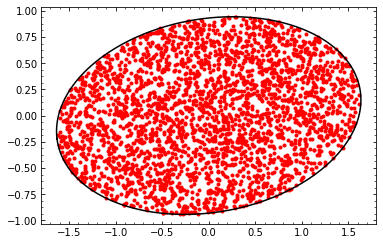

In [10]:
#Construct constant for number of samples
N = 3000

#Unifromly sample circle
r = np.random.random(size=N)
R = np.sqrt(r)
theta = 2*np.pi * np.random.random(size=N)
x = R*np.cos(theta)
y = R*np.sin(theta)

#Put sampling in an array
x_2prime = np.array([x, y])

#Make a function for transfoming a circle into an ellipse
def circ_elip (x_2prime) :
    #Construct A and gamma
    A = np.array([[5., -11/8],
               [-11/8, 15]])
    gamma = 13.
    
    #Diagonalize A
    w, B = la.eig(A)
    a = np.real(np.sqrt(gamma/w[0]))
    b = np.real(np.sqrt(gamma/w[1]))
    #I am only using np.real because the eigenvalues are real and I get an
    #error message on the first run after restarteing the Kernel if I don't
    #for casting the imaginary a and b into real things in later computations
    
    #Transform cicle to ellipse
    x_prime = x_2prime*np.array([[a],
                             [b]])
    
    #Return rotated ellipse
    return B@x_prime

#Construct sampled ellipse with function
elip = circ_elip(x_2prime)

#Make a circle perimeter
t = np.linspace(0, 2*np.pi, 10**3)
x_circ = np.cos(t)
y_circ = np.sin(t)

#Transform circle perimeter to rotated ellipse perimeter
x_2prime_circ = np.array([x_circ, y_circ])
elip_out = circ_elip(x_2prime_circ)

#Plot everything
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(elip[0],elip[1], 'r.')
ax.plot(elip_out[0],elip_out[1], color = 'black');

## Turn in the Exam

Turn in the exam following the procedure described at the top of the notebook.